In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import re
import string
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

In [2]:
train_data="""A Boeing 737 MAX aircraft operated by Southwest Airlines made an emergency landing on Tuesday after experiencing an engine problem as it was being ferried from Florida to California, the US Federal Aviation Agency said. "The aircraft returned and landed safely in Orlando," the FAA said in a statement, adding that no passengers were on board the aircraft, which was being transferred to Victorville, California for storage. "The FAA is investigating," added the agency, which grounded the Boeing 737 MAX on March 13 following two deadly accidents involving Ethiopian Airlines and Lion Air but continues to allow the planes to be ferried from airport to airport. Southwest said the plane experienced an engine problem "shortly after takeoff." "The crew followed protocol and safely landed back at the airport" around 3:00 pm (1900 GMT), spokesman Chris Mainz said. "The Boeing 737 MAX 8 will be moved to our Orlando maintenance facility for a review." It was the latest setback for Boeing's flagship narrow-body plane following October's Lion Air crash and the Ethiopian Airlines accident earlier this month, which together killed 346 people. The accidents, which shared similarities, led authorities across the world to ground the aircraft. Boeing has since conducted test flights of its 737 MAX to evaluate a fix for the MCAS stall prevention system targeted as a potential cause for the deadly crashes, two sources familiar with the matter said. The system has been criticized since it can malfunction and make it difficult for pilots to control the aircraft. Both of the recent crashes occurred moments after takeoff. A Senate Commerce Committee panel will hold a hearing Wednesday to question FAA Acting Administration Daniel Elwell and Transportation Department Inspector General Calvin Scovel The officials are expected to face questions from lawmakers on the FAA's certification of the 737 MAX and whether regulators have become too cozy with the company, and fast-tracked some approvals. The session is expected to be followed by a second hearing at a later date with Boeing, airline pilots and other stakeholders, the committee said.""" 
train_data=train_data.replace('!','.')
train_data=train_data.replace('?','.')





In [3]:
split_data=train_data.split('.')

#tokens=word_tokenize(train_data)
stopWords=stopwords.words("english")+list(string.punctuation)+['The','the',"A","a","\'"]
special_chars=[',','.','/','"','?','!',';',',',',',"'",'"']
count_vect=CountVectorizer(input=tokens,lowercase=True,stop_words='english',min_df=2)
for token in word_tokenize(train_data):
    if token.lower() in stopWords:
        tokens.remove(token)
    if token=='the':
        tokens.remove(token)
for token in tokens:
    if token in special_chars:
        tokens.remove(token)

tot_length=int(tokens.count(max(tokens,key=tokens.count)))
weight={}
weight_sent={}


###remove redundant tokens
def red_tokens(tokens):
    tokens=list(set(tokens))
        
###calculation of the weights
def calc_weights(tokens):
    for token in tokens:
        weight[token]=tokens.count(token)/tot_length


In [4]:
red_tokens(tokens)
calc_weights(tokens)

In [5]:
count=0
for sent in split_data:
    count=0
    split=sent.split(' ')
    for word in split:
        if word in tokens:
            count=count+weight[word]
    weight_sent[sent]=count
        


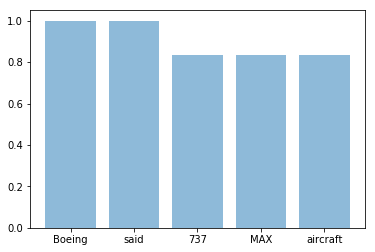

In [6]:
y_pos = np.arange(len(weight))
performance=list(weight.values())

weight_=sorted(weight,key=weight.get,reverse=True)
weight_=weight_[0:5]
weight_val=[]
for i in weight_:
    weight_val.append(weight[i])

plt.bar(weight_, weight_val, align='center', alpha=0.5)
plt.show()

In [7]:
weight_=sorted(weight_sent,key=weight_sent.get,reverse=True)
weight_=weight_[0:2]
weight_val=[]
print(weight_)


[' "The FAA is investigating," added the agency, which grounded the Boeing 737 MAX on March 13 following two deadly accidents involving Ethiopian Airlines and Lion Air but continues to allow the planes to be ferried from airport to airport', " A Senate Commerce Committee panel will hold a hearing Wednesday to question FAA Acting Administration Daniel Elwell and Transportation Department Inspector General Calvin Scovel The officials are expected to face questions from lawmakers on the FAA's certification of the 737 MAX and whether regulators have become too cozy with the company, and fast-tracked some approvals"]
